In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot

東京大学数理・データサイエンスコンソーシアム 社会人向け講座 2019年秋

# 解析・線形代数入門 〜データサイエンスのための〜

# 1-4 未定乗数法

## 条件付き最適化問題

* 制約条件$g(x,y)=b$ ($b$は定数)の下で、目的関数$f(x,y)$を最小化する$(x,y)=(x^*,y^*)$を求める

* 例: $g(x)=x+y=2$の下で、$f(x,y)=2-xy$を最小化する
  * 制約条件$y=-x+2$と、$f(x,y)=a$において$a$の値をいろいろ変えた関数$y=(2-a)/x$をプロットしてみる
  * $(x,y)=(1,1)$で最小値1をとる

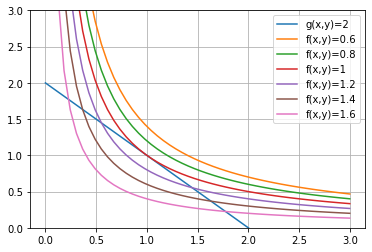

In [2]:
x = numpy.linspace(0.001,3);
pyplot.plot(x, -x+2, label="g(x,y)=2");
pyplot.plot(x, (2-0.6)/x, label="f(x,y)=0.6");
pyplot.plot(x, (2-0.8)/x, label="f(x,y)=0.8");
pyplot.plot(x, (2-1)/x, label="f(x,y)=1");
pyplot.plot(x, (2-1.2)/x, label="f(x,y)=1.2");
pyplot.plot(x, (2-1.4)/x, label="f(x,y)=1.4");
pyplot.plot(x, (2-1.6)/x, label="f(x,y)=1.6");
pyplot.ylim((0, 3)); # y軸の範囲を0から3に限定
pyplot.legend(); # 凡例を表示
pyplot.grid(which="major"); # グリッドを表示

* 例: 制約条件$g(x,y)=cx+dy=b$の場合
  * $d \ne 0$のとき<br>
    $\displaystyle y=-\frac{c}{d} x + \frac{b}{d}$
  * 目的関数$f(x,y)$に代入<br>
    $\displaystyle f(x,-\frac{c}{d} x + \frac{b}{d})$
  * これを$F(x)$とおくと、$F(x)$は$x$のみの関数なので、極値をとるのは<br>
    $\displaystyle \frac{dF}{dx} = \frac{\partial f}{\partial x} + \frac{\partial f}{\partial y} \frac{d}{dx} (-\frac{c}{d} x + \frac{b}{d}) = \frac{\partial f}{\partial x} - \frac{c}{d} \frac{\partial f}{\partial y} =0 $<br>
    のとき
  * 変形すると<br>
    $\displaystyle \frac{f_y}{f_x} = \frac{d}{c}$<br>
    これは極値をとる点$(x^*,y^*)$において、$g(x,y)=b$と$f(x,y)=f(x^*,y^*)$の法線の傾きが等しいことを意味している
  * あるいは<br>
    $\displaystyle -\frac{f_x}{f_y} = -\frac{c}{d}$<br>
    これは極値をとる点$(x^*,y^*)$において、$g(x,y)=b$と$f(x,y)=f(x^*,y^*)$の接線の傾きが等しいことを意味している
  * すなわち二つの曲線は接している

## より一般の場合

* 制約条件$g(x,y)=b$を解いて、$y=h(x)$を得たとする
  * つまり$g(x,h(x))=b$が成り立つ
* このとき<br>
  * $\displaystyle \frac{dh}{dx} = - \frac{g_x}{g_y}$ (陰関数の微分公式)
* 次に$y=h(x)$を使って、$f(x,y)$から$y$を消去<br>
  $\displaystyle f(x,y) = f(x,h(x)) = F(x)$
* $F(x)$は$x$のみの関数なので、極値をとるのは<br>
  $\displaystyle \frac{dF}{dx} = \frac{\partial f}{\partial x} + \frac{\partial f}{\partial y} \frac{dh}{dx} = \frac{\partial f}{\partial x} - \frac{\partial f}{\partial y} \frac{g_x}{g_y} =0 $<br>
  のとき
* 変形すると<br>
  $\displaystyle \frac{f_y}{f_x} = \frac{g_y}{g_x}$<br>
  これは極値をとる点$(x^*,y^*)$において、$g(x,y)=b$と$f(x,y)=f(x^*,y^*)$の法線の傾きが等しいことを意味している
* あるいは<br>
  $\displaystyle -\frac{f_x}{f_y} = -\frac{g_x}{g_y}$<br>
  これは極値をとる点$(x^*,y^*)$において、$g(x,y)=b$と$f(x,y)=f(x^*,y^*)$の接線の傾きが等しいことを意味している
* あるいは、ある$\lambda \ne 0$があって<br>
  \begin{align*}
    f_x &= \lambda g_x \\
    f_y &= \lambda g_y
  \end{align*}
  とも書ける

## ラグランジュの未定乗数法
* 制約条件$g(x,y)=b$を$y$について解くかわりに、新しい変数$\lambda$を導入した三変数関数を導入<br>
  $F(x,y,\lambda) = f(x,y) - \lambda (g(x,y)-b)$
* $\lambda$を未定乗数と呼ぶ
* この三変数関数$F(x,y,\lambda)$が極値をとる条件は<br>
  \begin{align*}
    F_x &= f_x - \lambda g_x = 0 \\
    F_y &= f_y - \lambda g_y = 0 \\
    F_\lambda &= g(x,y) - b = 0
  \end{align*}
* 第3式は制約条件そのもの
* 第1式、第2式は、法線の傾きが一致する条件

* 例: $g(x,y)=x+y=2$、$f(x,y)=xy$のとき<br>
  * $F(x,y,\lambda) = f(x,y) - \lambda (g(x,y)-2) = xy - \lambda(x+y-2)$ <br>
  * 極値をとる条件<br>
    \begin{align*}
    F_x &= y-\lambda=0 \\
    F_y &= x-\lambda=0 \\
    F_\lambda &= x+y-2 = 0
    \end{align*}
  * これを解いて、$(x,y,\lambda)=(1,1,1)$を得る
  * 今の場合、$f(x,y)$は最小値ではなく最大値をとることに注意

### 注意
* 微分が零という条件からは、極大か極小かは分からない
* 鞍点である可能性も
* 実際に代入してみて確認する必要がある

### 未定乗数法の利点
* $m$個の制約条件<br>
  \begin{align*}
  g_1(x_1,x_2,\cdots,x_n) &= b_1 \\
  g_2(x_1,x_2,\cdots,x_n) &= b_2 \\
  \vdots \\
  g_m(x_1,x_2,\cdots,x_n) &= b_m
  \end{align*}
  の下での$n$変数関数$f(x_1,x_2,\cdots,x_n)$の最小化
* $\displaystyle F(x_1,x_2,\cdots,x_n) = f(x_1,x_2,\cdots,x_n) - \sum_{j=1}^m \lambda_j (g_j(x_1,x_2,\cdots,x_n)-b_j)$に関する$(n+m)$変数最小化問題<br>
  $\displaystyle \frac{\partial F}{\partial x_i} = 0 \ \ \ (i=1 \cdots n)$ <br>
  $\displaystyle \frac{\partial F}{\partial \lambda_j} = 0 \ \ \ (j=1 \cdots m)$ <br>
  に書き換えられる
* (一般的に、$m$個の制約条件の式を解いて、$x_1 \cdots x_{m-1}$を消去するのは難しい)
* 計算で勾配降下法などを使って解くことが可能